In [1]:
import pandas as pd
import numpy as np


In [4]:
DATAPATH = "../Data/FA_PM/fa_pm_merged_data.csv"
fa_pm = pd.read_csv(DATAPATH)
#fa_pm.drop(['Unnamed: 0'], axis = 1, inplace= True)
fa_pm.head()

,Tract,fips,state,total_population,food_insecurity_rate_2018,food_insecurity_num_2018,food_insecurity_rate_2020,food_insecurity_num_2020,food_insecurity_num_change_2020,unemployment_change,...,proportion_bachelors_degree,proportion_disabled,proportion_hispanic,prop_men,prop_nonwhite,prop_nonenglish_speaking,prop_families_poverty,prop_students_in_public_school,social_vulnerability_index,thiel_racial_segregation_index
0,"Census Tract 1001, Cook County, Illinois",17031,IL,"5,563",0.099,550,0.149,820,270,0.07,...,26.32,10.84,16.07,48.30,4.31,12.54,6.60,53.92,0.36,0.24
1,"Census Tract 1002, Cook County, Illinois",17031,IL,"6,872",0.060,410,0.110,750,340,0.07,...,22.21,6.48,11.04,47.22,10.84,5.79,11.35,79.56,0.34,0.20
2,"Census Tract 1003, Cook County, Illinois",17031,IL,"6,186",0.074,460,0.123,770,310,0.07,...,25.82,17.10,10.17,44.94,11.75,7.64,2.00,68.25,0.30,0.22
3,"Census Tract 1004, Cook County, Illinois",17031,IL,"3,364",0.055,180,0.104,350,170,0.07,...,28.45,8.98,13.97,51.25,7.52,3.97,0.93,68.16,0.27,0.15
4,"Census Tract 1005, Cook County, Illinois",17031,IL,"5,696",0.052,290,0.101,570,280,0.07,...,25.93,12.90,10.45,47.82,12.34,14.19,0.00,68.67,0.28,0.20


In [5]:
fa_pm.shape

(1319, 32)

In [6]:
print(fa_pm.isnull().sum())

Tract                                0
fips                                 0
state                                0
total_population                     0
food_insecurity_rate_2018            0
food_insecurity_num_2018             0
food_insecurity_rate_2020            0
food_insecurity_num_2020             0
food_insecurity_num_change_2020      0
unemployment_change                  0
local_census_tract                   0
avg_household_size                   9
avg_travel_time_to_work            422
computer_access                      9
life_expectancy                    123
median_age                           9
median_home_loan_amount             17
median_home_value                   22
median_household_income              9
median_leverage_ratio               17
num_jobs                             7
num_housing_units                    5
proportion_bachelors_degree          9
proportion_disabled                  9
proportion_hispanic                  9
prop_men                 

In [7]:
imp_list = [('avg_travel_time_to_work', 'mean'), ('computer_access', 'median'), ('life_expectancy', 'median'), 
 ('median_age', 'mean'), ('median_home_loan_amount', 'median'), ('median_home_value', 'median'), 
 ('median_household_income', 'median'), ('median_leverage_ratio', 'mean'), ('num_jobs', 'mean'), 
 ('num_housing_units', 'mean'), ('proportion_bachelors_degree', 'median'), ('proportion_disabled', 'mean'),
 ('proportion_hispanic', 'median'), ('prop_men', 'mean'), ('prop_nonwhite', 'median'),
('prop_nonenglish_speaking', 'median'), ('prop_families_poverty', 'median'),
('prop_students_in_public_school','median'), ('social_vulnerability_index','mean'),
('thiel_racial_segregation_index', 'mean')]

def impute_val(val):
    if np.isnan(val):
        if IMP_TYPE=='median':
            return fa_pm[COL_NAME].median()
        if IMP_TYPE=='mean':
            return fa_pm[COL_NAME].mean()
    else:
        return val


for COL_NAME, IMP_TYPE in imp_list:
    fa_pm[COL_NAME] = fa_pm[COL_NAME].apply(impute_val)
    
fa_pm.head()

,Tract,fips,state,total_population,food_insecurity_rate_2018,food_insecurity_num_2018,food_insecurity_rate_2020,food_insecurity_num_2020,food_insecurity_num_change_2020,unemployment_change,...,proportion_bachelors_degree,proportion_disabled,proportion_hispanic,prop_men,prop_nonwhite,prop_nonenglish_speaking,prop_families_poverty,prop_students_in_public_school,social_vulnerability_index,thiel_racial_segregation_index
0,"Census Tract 1001, Cook County, Illinois",17031,IL,"5,563",0.099,550,0.149,820,270,0.07,...,26.32,10.84,16.07,48.30,4.31,12.54,6.60,53.92,0.36,0.24
1,"Census Tract 1002, Cook County, Illinois",17031,IL,"6,872",0.060,410,0.110,750,340,0.07,...,22.21,6.48,11.04,47.22,10.84,5.79,11.35,79.56,0.34,0.20
2,"Census Tract 1003, Cook County, Illinois",17031,IL,"6,186",0.074,460,0.123,770,310,0.07,...,25.82,17.10,10.17,44.94,11.75,7.64,2.00,68.25,0.30,0.22
3,"Census Tract 1004, Cook County, Illinois",17031,IL,"3,364",0.055,180,0.104,350,170,0.07,...,28.45,8.98,13.97,51.25,7.52,3.97,0.93,68.16,0.27,0.15
4,"Census Tract 1005, Cook County, Illinois",17031,IL,"5,696",0.052,290,0.101,570,280,0.07,...,25.93,12.90,10.45,47.82,12.34,14.19,0.00,68.67,0.28,0.20


In [8]:
#check if there are still null values
print(fa_pm.isnull().sum())

Tract                              0
fips                               0
state                              0
total_population                   0
food_insecurity_rate_2018          0
food_insecurity_num_2018           0
food_insecurity_rate_2020          0
food_insecurity_num_2020           0
food_insecurity_num_change_2020    0
unemployment_change                0
local_census_tract                 0
avg_household_size                 9
avg_travel_time_to_work            0
computer_access                    0
life_expectancy                    0
median_age                         0
median_home_loan_amount            0
median_home_value                  0
median_household_income            0
median_leverage_ratio              0
num_jobs                           0
num_housing_units                  0
proportion_bachelors_degree        0
proportion_disabled                0
proportion_hispanic                0
prop_men                           0
prop_nonwhite                      0
p

In [50]:
fa_pm.to_csv("../Data/Modelling Data/fa_pm-model.csv")

In [5]:
fa_pm_evanston = pd.read_csv("../Data/FA_PM/fa_pm_evanston.csv")
fa_pm_evanston.drop('Unnamed: 0', axis = 1, inplace = True)
fa_pm_evanston.head()

,Tract,fips,state,total_population,food_insecurity_rate_2018,food_insecurity_num_2018,food_insecurity_rate_2020,food_insecurity_num_2020,food_insecurity_num_change_2020,unemployment_change,...,proportion_bachelors_degree,proportion_disabled,proportion_hispanic,prop_men,prop_nonwhite,prop_nonenglish_speaking,prop_families_poverty,prop_students_in_public_school,social_vulnerability_index,thiel_racial_segregation_index
0,"Census Tract 8087.02, Cook County, Illinois",17031,IL,"5,255",0.117,620,0.167,880,260,0.07,...,34.86,5.90,9.36,45.40,34.33,5.38,0.00,92.96,0.40,0.04
1,"Census Tract 8088, Cook County, Illinois",17031,IL,"3,732",0.049,180,0.099,360,180,0.07,...,35.40,5.18,3.94,47.91,13.99,5.76,2.87,71.92,0.16,0.25
2,"Census Tract 8089, Cook County, Illinois",17031,IL,"4,175",0.036,150,0.086,360,210,0.07,...,32.18,6.88,4.26,48.12,7.19,3.61,2.24,88.43,0.19,0.25
3,"Census Tract 8090, Cook County, Illinois",17031,IL,"4,153",0.045,190,0.095,400,210,0.07,...,34.32,9.11,1.69,45.94,14.54,3.30,0.00,83.72,0.29,0.29
4,"Census Tract 8091, Cook County, Illinois",17031,IL,"3,293",0.048,160,0.097,320,160,0.07,...,29.65,9.95,4.28,43.40,15.70,3.17,2.33,91.34,0.34,0.24


In [8]:
#avg travel time to work, and life expectancy have missing vars
print(fa_pm_evanston.isnull().sum())

Tract                              0
fips                               0
state                              0
total_population                   0
food_insecurity_rate_2018          0
food_insecurity_num_2018           0
food_insecurity_rate_2020          0
food_insecurity_num_2020           0
food_insecurity_num_change_2020    0
unemployment_change                0
local_census_tract                 0
avg_household_size                 0
avg_travel_time_to_work            2
computer_access                    0
life_expectancy                    3
median_age                         0
median_home_loan_amount            0
median_home_value                  0
median_household_income            0
median_leverage_ratio              0
num_jobs                           0
num_housing_units                  0
proportion_bachelors_degree        0
proportion_disabled                0
proportion_hispanic                0
prop_men                           0
prop_nonwhite                      0
p

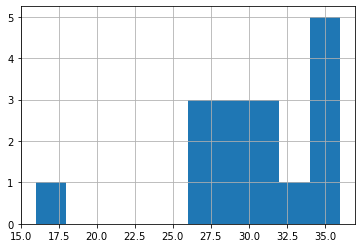

In [11]:
#avg travel time to work has a discontinuous dist, so let's use median imputation
fa_pm_evanston['avg_travel_time_to_work'].hist()

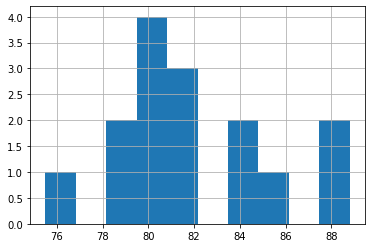

In [14]:
#life expectancy has a discontinuous dist, so let's use median imputation
fa_pm_evanston['life_expectancy'].hist()

In [18]:
median_trav_time = fa_pm_evanston['avg_travel_time_to_work'].median()
median_life_exp = fa_pm_evanston['life_expectancy'].median()

fa_pm_evanston["avg_travel_time_to_work"] = fa_pm_evanston['avg_travel_time_to_work'].apply(
    lambda val: median_trav_time if np.isnan(val) else val)
fa_pm_evanston['life_expectancy'] = fa_pm_evanston['life_expectancy'].apply(
    lambda val: median_life_exp if np.isnan(val) else val)
print(fa_pm_evanston.isnull().sum())

Tract                              0
fips                               0
state                              0
total_population                   0
food_insecurity_rate_2018          0
food_insecurity_num_2018           0
food_insecurity_rate_2020          0
food_insecurity_num_2020           0
food_insecurity_num_change_2020    0
unemployment_change                0
local_census_tract                 0
avg_household_size                 0
avg_travel_time_to_work            0
computer_access                    0
life_expectancy                    0
median_age                         0
median_home_loan_amount            0
median_home_value                  0
median_household_income            0
median_leverage_ratio              0
num_jobs                           0
num_housing_units                  0
proportion_bachelors_degree        0
proportion_disabled                0
proportion_hispanic                0
prop_men                           0
prop_nonwhite                      0
p

In [19]:

#write data to modelling data folder
fa_pm_evanston.to_csv("../Data/Modelling Data/fa_pm_evanston-model.csv")